In [3]:
# Importing modules
import pandas as pd
# import os

# os.chdir('..')


In [4]:
# Read data into blogPosts
blogPosts = pd.read_csv('Indo-pacific-blog-data.csv')

# Print head
# This shows us the content of the crawled blog data for analysis purpose
blogPosts.head()

,blogpost_id,title,date,blogger,categories,post,post_length,num_outlinks,num_inlinks,num_comments,comments_url,permalink,blogsite_id,tags,location,sentiment,language,influence_score,last_modified_time
0,1,Ukraine and the ‘New Cold War: The Return of N...,2014-06-04 00:00:00,Matt Finucane,NaN,Whether the Crimean crisis heralds a new era o...,4777,12,0,2,NaN,http://afieldofviews.wordpress.com/2014/06/04/...,1,"Crimea, EU, Finland, Hungary, IMF, Neutralism,...",ES,-0.353554,English,0.0,2020-07-21 12:30:00
1,2,Guest Post: China and the Crimea Conundrum,2014-03-12 00:00:00,Matt Finucane,NaN,With the EU-US alliance’s imposition of heavy ...,9338,16,0,7,NaN,http://afieldofviews.wordpress.com/2014/03/12/...,1,"China, Crimea, Putin, Russia, Tibet, Uighurs, ...",ES,-0.177808,English,8.0,2020-07-21 12:30:00
2,3,Power vs. Interest: Ukraine’s Dwindling Options,2014-03-02 00:00:00,Matt Finucane,NaN,Predictions regarding Ukraine’s future followi...,2673,11,0,0,NaN,http://afieldofviews.wordpress.com/2014/03/02/...,1,"Crimea, Euromaidan, Invasion, Lithuania, NATO,...",ES,-0.175542,English,-3.0,2020-07-21 12:30:00
3,4,Hanging in the Balance: Ukraine’s Russian Repu...,2014-03-01 00:00:00,Matt Finucane,NaN,"Over the past four or so months, Ukraine has w...",4600,13,0,0,NaN,http://afieldofviews.wordpress.com/2014/03/01/...,1,"Crimea, EU, Euromaidan, Invasion, NATO, Putin,...",ES,-0.212766,English,-4.0,2020-07-21 12:30:00
4,5,Two Very Different Wars on Terrorism: How the ...,2014-02-03 00:00:00,Matt Finucane,NaN,"On the 29th of December, at 12:40 Moscow Time,...",5263,22,0,0,NaN,http://afieldofviews.wordpress.com/2014/02/03/...,1,"Afghanistan, bombings, Chechnya, Doku Umarov, ...",ES,-0.197037,English,-7.0,2020-07-21 12:30:00


In [5]:
# Remove the columns that are not useful for this study examples of removed columns are 'categories', 'comments_url'
blogPosts = blogPosts.drop(columns=['categories', 'comments_url'], axis=1)

# Print out the first rows of blogPosts with new updated dataframe excluding 'categories', 'comments_url'
blogPosts.head()
blogPosts.to_csv("./results/lda/Indo-pacific-blog-post.csv")

In [6]:
# Load the regular expression library
import re

# Remove punctuation and unwanted dataset to allow a more clean data when we start performing LDA on the dataset
# We used the post column for this purpose and create a new column from the dataset blog_post_processed column
blogPosts['blog_post_processed'] = \
blogPosts['post'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the all text to lowercase for the processed blogpost column
blogPosts['blog_post_processed'] = \
blogPosts['blog_post_processed'].map(lambda x: x.lower())

# Print out the head section which represents the first few columns present in the dataset
blogPosts['blog_post_processed'].head()
blog_post_processed_header = ['blogpost_id','title','date','blogger','tags','sentiment','location','blog_post_processed']
blogPosts.to_csv("./results/lda/Indo-pacific-processed-post.csv", columns=blog_post_processed_header)

In [7]:
# Import the wordcloud library
%pip install wordcloud



[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


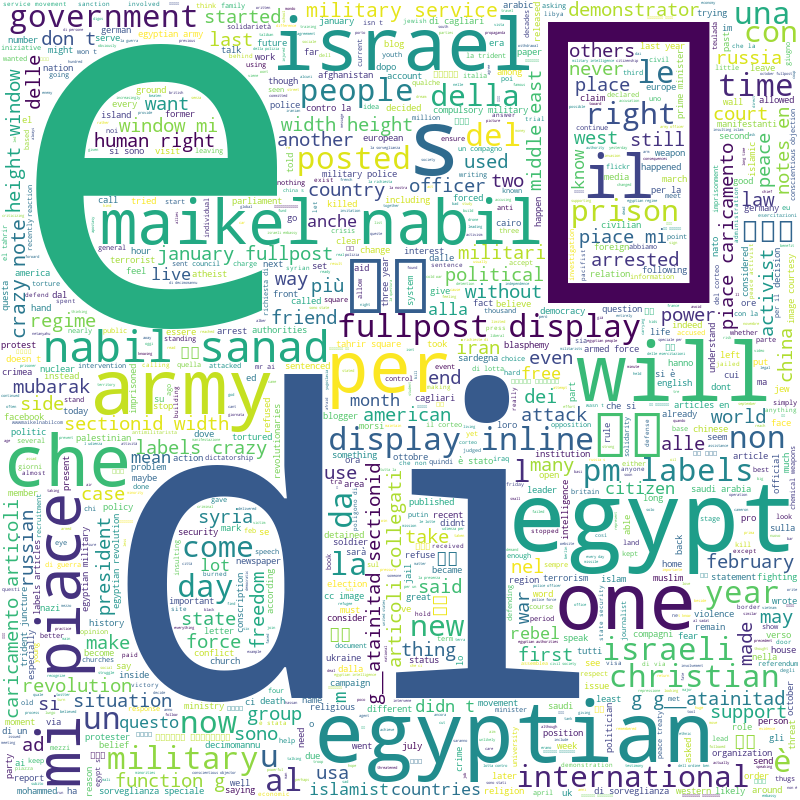

In [8]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(blogPosts['blog_post_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, width=800, contour_width=2, contour_color='steelblue', height=800)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = blogPosts['blog_post_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
# data_words
print(data_words[:1][0][:len(data_words)-1])
words = pd.DataFrame(data_words[:1][0][:len(data_words)-1])
words.to_csv("results/lda/Indo-pacific-processed-words.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asakinnubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['whether', 'crimean', 'crisis', 'heralds', 'new', 'era', 'international', 'relations', 'clearly', 'pivotal', 'moment', 'russia', 'relationship', 'west', 'world', 'balances', 'power', 'shifting', 'though', 'united', 'states', 'remains', 'unrivalled', 'sheer', 'power', 'close', 'borders', 'rising', 'china', 'increasingly', 'assertive', 'russia', 'allegedly', 'emboldened', 'obama', 'vacillations', 'syria', 'ukraine', 'grey', 'areas', 'emerging', 'states', 'vulnerable', 'revisionist', 'powers', 'alarmed', 'obama', 'hands', 'approach', 'policy', 'neutralism', 'appears', 'increasingly', 'worthy', 'revival', 'neutralism', 'defined', 'cold', 'war', 'foreign', 'policy', 'pioneered', 'finland', 'later', 'adopted', 'josip', 'tito', 'yugoslavia', 'following', 'split', 'stalin', 'geographically', 'sandwiched', 'two', 'antagonistic', 'blocs', 'neutralism', 'prescribed', 'balanced', 'relationships', 'side', 'neutral', 'states', 'reaped', 'rewards', 'otherwise', 'reserved', 'paid', 'members', 'either

In [10]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:len(corpus)-1])
corpus_terms_m = pd.DataFrame(corpus[:1][0][:len(corpus)-1])
corpus_terms_m.to_csv("results/lda/Indo-pacific-processed-corpus_terms_m.csv")

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 4), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 2),

In [11]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_ld_df = pd.DataFrame(doc_lda)
doc_ld_df.to_csv("results/lda/Indo-pacific-processed-doc_lda.csv")

[(0,
  '0.005*"di" + 0.005*"la" + 0.004*"military" + 0.004*"egyptian" + 0.003*"il" '
  '+ 0.003*"egypt" + 0.003*"من" + 0.003*"che" + 0.003*"per" + 0.003*"في"'),
 (1,
  '0.005*"في" + 0.005*"di" + 0.004*"من" + 0.003*"army" + 0.003*"egyptian" + '
  '0.003*"egypt" + 0.003*"military" + 0.003*"على" + 0.003*"la" + 0.003*"che"'),
 (2,
  '0.010*"di" + 0.006*"la" + 0.005*"military" + 0.005*"egyptian" + '
  '0.005*"egypt" + 0.004*"il" + 0.003*"che" + 0.003*"un" + 0.003*"في" + '
  '0.003*"non"'),
 (3,
  '0.017*"di" + 0.011*"la" + 0.006*"che" + 0.005*"il" + 0.005*"per" + '
  '0.005*"le" + 0.004*"della" + 0.004*"un" + 0.004*"si" + 0.004*"non"'),
 (4,
  '0.014*"di" + 0.007*"per" + 0.006*"la" + 0.006*"il" + 0.005*"che" + '
  '0.005*"le" + 0.004*"military" + 0.004*"egyptian" + 0.004*"un" + '
  '0.004*"army"'),
 (5,
  '0.008*"egyptian" + 0.007*"في" + 0.006*"egypt" + 0.005*"military" + '
  '0.004*"israel" + 0.004*"nabil" + 0.004*"من" + 0.004*"maikel" + 0.003*"army" '
  '+ 0.003*"fullpost"'),
 (6,
  '0.01

In [12]:
%pip install pyldavis



[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/lda/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/lda/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.043720  0.008480       1        1  24.147776
9     -0.033604 -0.010589       2        1  19.352017
3      0.044567 -0.010564       3        1  14.754790
4      0.015916  0.000555       4        1  11.284746
6      0.017616  0.016477       5        1   9.064890
1     -0.019039 -0.004653       6        1   6.393441
8      0.018558 -0.002206       7        1   5.290703
0     -0.003993 -0.015582       8        1   4.137402
7      0.003230  0.024728       9        1   3.832663
2      0.000470 -0.006645      10        1   1.741572, topic_info=          Term        Freq       Total Category  logprob  loglift
9421        di  416.000000  416.000000  Default  30.0000  30.0000
9433        la  232.000000  232.000000  Default  29.0000  29.0000
9430        il  168.000000  168.000000  Default  28.0000  28.0000
162   military  232.000000  232.000000  Default  27.0000  27.0000
9509       che  159.000000  159.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
3317   display    1.614084   88.934886  Topic10  -6.2968   0.0412
185        one    1.768085  115.020789  Topic10  -6.2056  -0.1248
3381     nabil    1.740837  113.184172  Topic10  -6.2212  -0.1243
3844        من    1.754888  138.201907  Topic10  -6.2131  -0.3159
9417       del    1.601479  103.805167  Topic10  -6.3046  -0.1212

[763 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4323      1  0.437993  activists
4323      2  0.170330  activists
4323      3  0.072999  activists
4323      4  0.097332  activists
4323      5  0.072999  activists
...     ...       ...        ...
9155      1  0.553938     يعبدون
9155      4  0.553938     يعبدون
9313      5  0.758820       يفكك
9350      5  0.758881      يقارن
9110      5  0.758909       يوذي

[1749 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 4, 5, 7, 2, 9, 1, 8, 3])